In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

from epyfilter import simulate_data

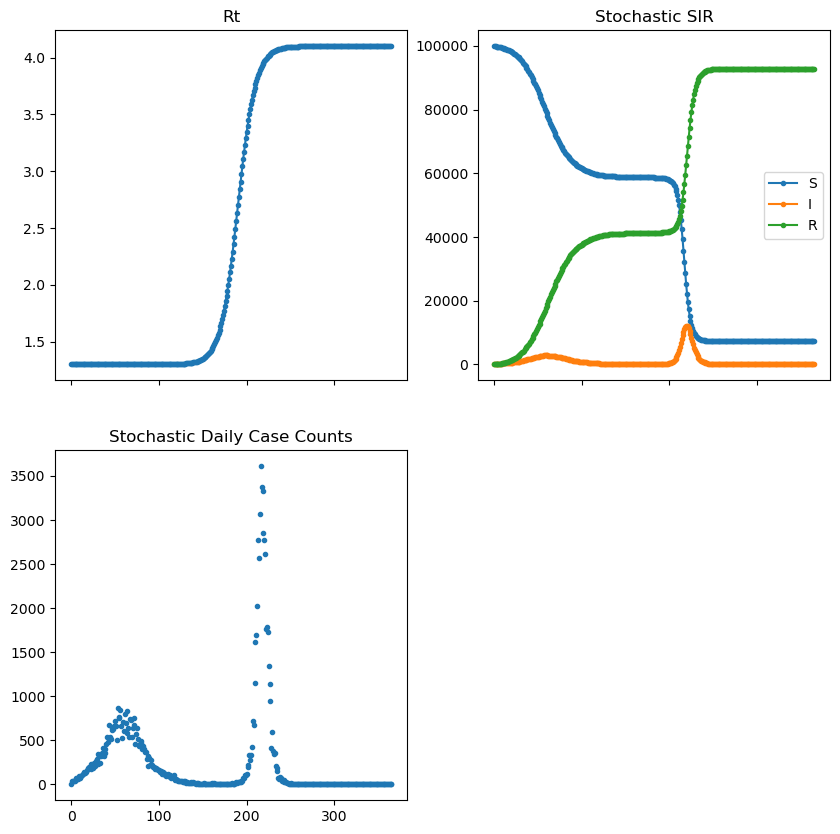

In [4]:
true_params = {
    'rt_0': 1.3,
    'rt_1': 4.1,
    'midpoint': 190.,
    'k': 0.1,
    'n_t': 365,
    't_I': 4.,
    'N': 100_000.,
    'S0': 99_900.,
    'I0': 100.,
}

np.random.seed(1994)

data = simulate_data.simulate_data(**true_params, add_noise=True, noise_param=1/50)

data.plot_all()
data.compute_data_distribution()


In [8]:
from epyfilter import model_da, eakf

from numpy.random import uniform

prior = {
    'beta':{
        'dist': uniform,
        'args':{
            'low': 0.1,
            'high': 2.,
        }
    },
    't_I':{
        'dist': "constant",
        # 'args':{
        #     'lower': 1.,
        #     'upper': 12.,
        # }
    },
}


model = model_da.SIR_model(data)

kf_no = eakf.EnsembleAdjustmentKalmanFilter(model, m=300)
kf_no.filter(prior, inf_method="none")

Percent of observations in 95% CI 61.75%
Percent of observations in 50% CI 46.72%


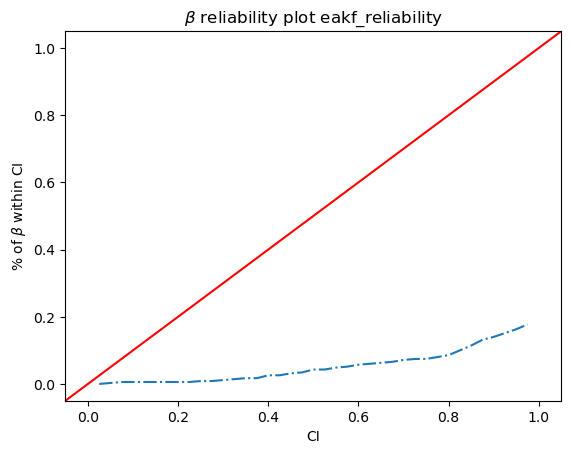

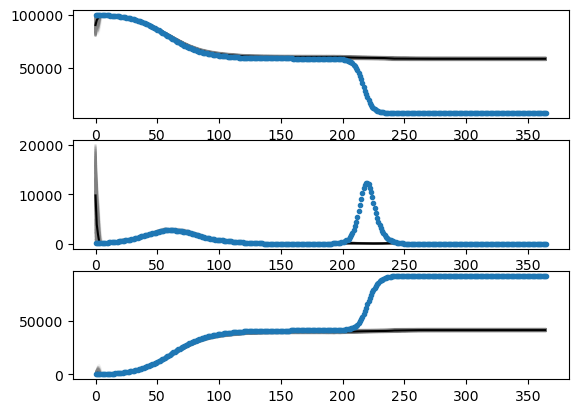

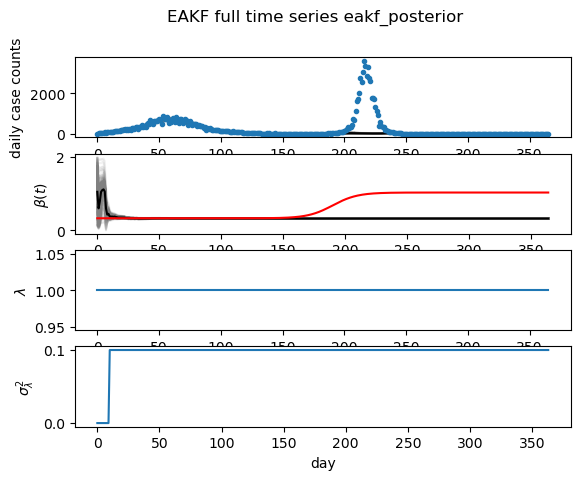

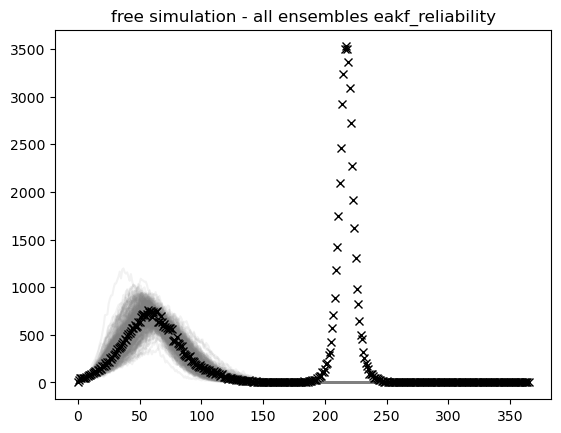

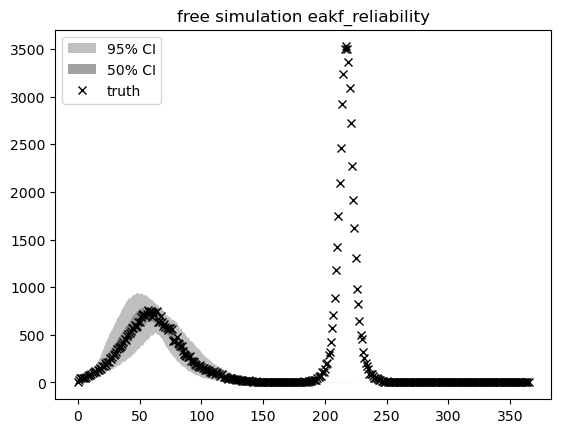

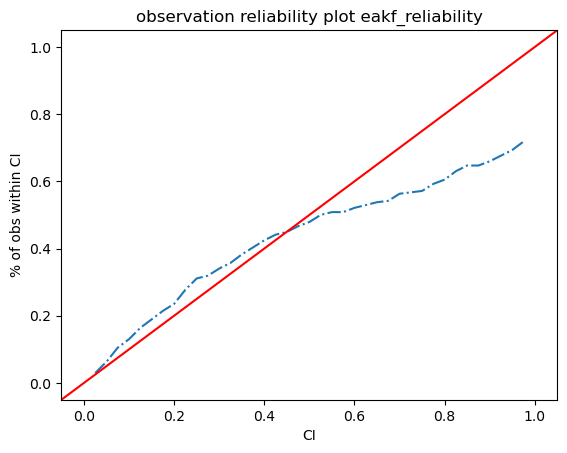

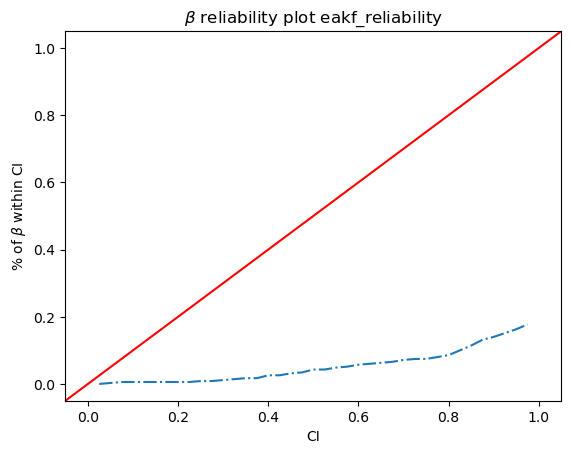

In [10]:
kf_no.plot_posterior()
kf_no.plot_reliability()